<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   現代文     40 non-null     int64
 1   古文      40 non-null     int64
 2   数学      40 non-null     int64
 3   化学      40 non-null     int64
 4   生物      40 non-null     int64
 5   物理      40 non-null     int64
 6   歴史      40 non-null     int64
 7   世界史     40 non-null     int64
 8   政治経済    40 non-null     int64
 9   英語      40 non-null     int64
dtypes: int64(10)
memory usage: 3.2 KB


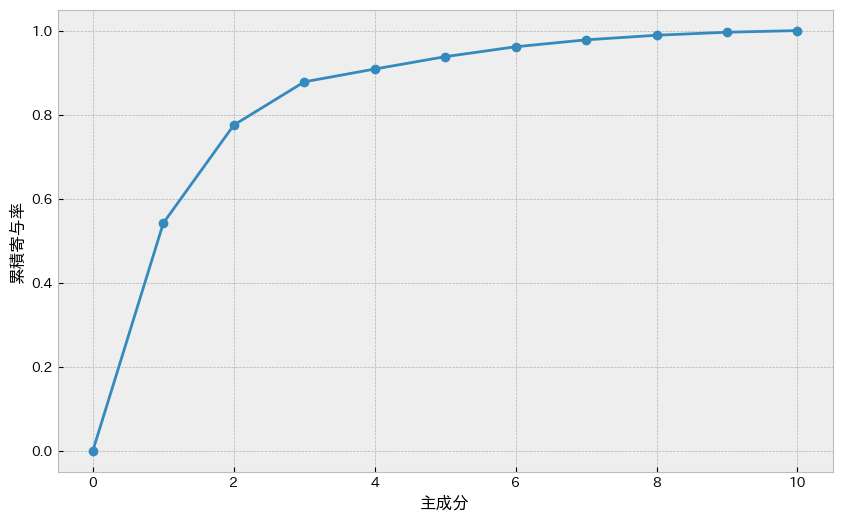

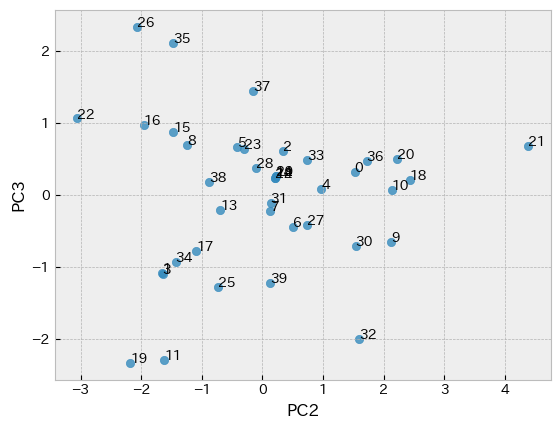

In [33]:
"""
多変量解析　主成分分析
"""

"""
コードの流れメモ（主成分分析の）

1. とりあえず可視化して、データの性質を観察(このコードで見たのは、「ばらつき」と「相関」)
2. 主成分分析を実行（標準化→モデル作成→分析（累積寄与率（これを基に主成分の数を決定）→主成分ごとの関係性を可視化））
    ※主成分分析中に所々データをフォーマットする作業が入ってます（主にDataFrameにフォーマット 👈ただ見やすくするために）
3. 2で可視化して気づいたことをまとめる（これはコーディングと関係ないです。）

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

import statsmodels.api as sm

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

plt.figure(figsize=(10, 6))

df = pd.read_csv('../../../data/dummy_data/academic_ability.csv')

# TODO:データの観察

# データの確認
df.shape
df.info()
df.describe()

# とりあえず可視化

# ばらつきを確認
# df.hist()
# plt.tight_layout()

# 相関を確認
# sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

# TODO: 主成分分析

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)

# モデル作成（主成分分析の）
from sklearn.decomposition import PCA
# NOTE:random_state=0 は、乱数のシード値を固定するためのもの
# NOTE: n_components は、主成分の数を指定するもの
pca = PCA(random_state=0)

# 分析
feature = pca.fit_transform(df_scaled)

# サイズ
feature.shape

# 特徴量（主成分分析の結果）をデータフレームに
pd.DataFrame(feature, columns=[f'PC{x+1}' for x in range(len(df.columns))])

# 累積寄与率
variance_ratio = pca.explained_variance_ratio_

# DataFrameに
pd.DataFrame(variance_ratio, index=[f'PC{x+1}' for x in range(len(df.columns))], columns=['寄与率'])

# 累積寄与率を可視化
# NOTE: plt.gca() は、現在のグラフ(Axesオブジェクト)を取得する関数
# NOTE: get_xaxis() は、Axesオブジェクトのx軸の設定を取得する関数
# NOTE: set_major_locator() は、目盛りの設定する関数
# NOTE: MaxNLocator() は、目盛りの最大値を指定する関数。integer=True は、整数値にするためのもの
# NOTE: np.cumsum() は、累積和を計算する関数
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(variance_ratio,)), '-o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.show()

# 主成分負荷量（Principal component loading）
# NOTE:　主成分負荷量 = 固有ベクトル　*　対応する固有値の平方根

# 固有ベクトル
eigen_vector = pca.components_

# DataFrameに
pd.DataFrame(eigen_vector, index=[f'PC{x+1}' for x in range(len(df.columns))], columns=df.columns)

# 固有値の平方根
sqrt_eigen_value = np.sqrt(pca.explained_variance_).reshape(10, 1)

# 主成分負荷量
factor_loadings = eigen_vector * sqrt_eigen_value

# DataFrameに
df_factor_loadings = pd.DataFrame(factor_loadings, index=[f'PC{x+1}' for x in range(len(df.columns))], columns=df.columns)

df_factor_loadings

# ヒートマップで可視化（わかりやすくするため）
# NOTE: head(3)なのは、下位の主成分は、寄与率が低いので、表示してもあまり意味ないから
# NOTE: この場合の解釈の例：PC1は全体が優秀な層、PC2は理系と文系を分ける成分、PC3は、文系を言語系と歴史系に分ける成分
# sns.heatmap(df_factor_loadings.head(3), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

# 第2主成分と第三主成分における観測変数の寄与度をプロットする
# for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns):
#     plt.text(x, y, name)
# plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)

# plt.xlabel('PC2')
# plt.ylabel('PC3')
# plt.show()

# 第1主成分と第2主成分における主成分得点
# for x, y, name in zip(feature[:, 0], feature[:, 1], list(range(len(feature)))):
#     plt.text(x, y, name)
    
# # x, y軸の名前の追加
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, cmap='Blues')

# 第2主成分と第3主成分における主成分得点
for x, y, name in zip(feature[:, 1], feature[:, 2], list(range(len(feature)))):
    plt.text(x, y, name)
    
# x, y軸の名前の追加
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, cmap='Blues')
    